In [23]:
# Standard DS imports
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn import neighbors
from sklearn.svm import SVC
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import time

In [24]:
# Define the file paths
file_paths = [
    './resultsof10.csv',
    './resultsof20.csv',
    './resultsof30.csv',
    './resultsof40.csv',
    './resultsof50.csv',
    './resultsof60.csv',
    './resultsof70.csv',
    './resultsof80.csv'
]

# Initialize an empty list to hold dataframes
dfs = []

# Loop through file paths, read each file, add an identifier, and append to the list
for file_path in file_paths:
    # Extract the identifier (e.g., "10", "20") from the file path
    identifier = file_path.split('resultsof')[1].split('.')[0]

    # Read the file
    df = pd.read_csv(file_path)

    # Add an identifier column to distinguish between different datasets
    df['dataset_size'] = identifier

    # Append the dataframe to the list
    dfs.append(df)

# Combine all dataframes into a single dataframe
df_combined = pd.concat(dfs, ignore_index=True)

In [25]:
# Filter the DataFrame to include only testing results
df_testing = df_combined[df_combined['algorithm'].str.contains('Testing')]

df_training = df_combined[df_combined['algorithm'].str.contains('Training')]

df_testing['model_source'] = df_testing['algorithm'].apply(lambda x: 'dataset.csv' if 'dataset.csv' in x else 'tracks.csv')

/var/folders/1g/qs1wt1d52t1fp_9wj2_z6vlr0000gn/T/ipykernel_46675/4040079065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['model_source'] = df_testing['algorithm'].apply(lambda x: 'dataset.csv' if 'dataset.csv' in x else 'tracks.csv')


/var/folders/1g/qs1wt1d52t1fp_9wj2_z6vlr0000gn/T/ipykernel_46675/2594199244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['base_model'] = df_testing['algorithm'].apply(lambda x: x.split(' ')[1])


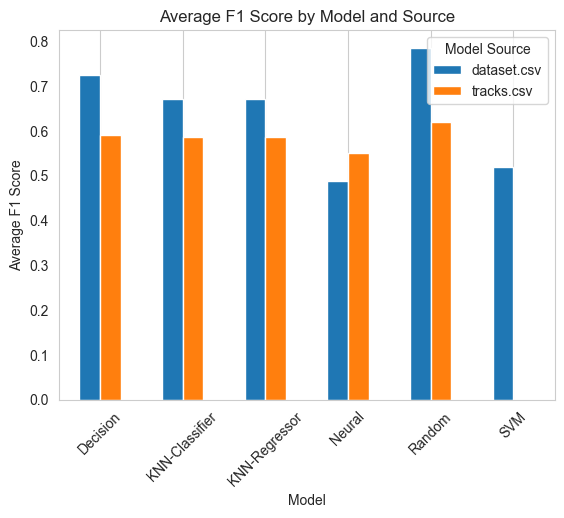

In [26]:
# Extract the base model name from the 'algorithm' column (ignoring "Training" or "Testing")
df_testing['base_model'] = df_testing['algorithm'].apply(lambda x: x.split(' ')[1])

# Calculate average F1 scores for each base model and model source combination
average_f1_by_model_source = df_testing.groupby(['base_model', 'model_source'])['f1_score'].mean().unstack()

# Plotting the double bar chart for each model
average_f1_by_model_source.plot(kind='bar')
plt.title('Average F1 Score by Model and Source')
plt.xlabel('Model')
plt.ylabel('Average F1 Score')
plt.xticks(rotation=45)
plt.legend(title='Model Source')
plt.grid(axis='y')

# Show plot
plt.show()


/var/folders/1g/qs1wt1d52t1fp_9wj2_z6vlr0000gn/T/ipykernel_46675/3262733584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['model_name'] = df_testing['algorithm'].apply(lambda x: x.split(' ')[1])


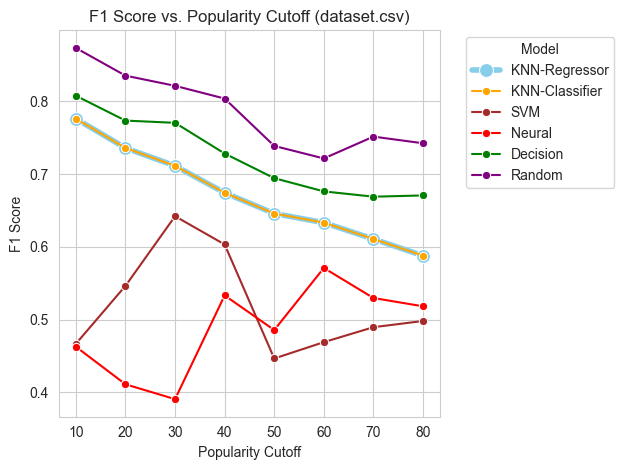

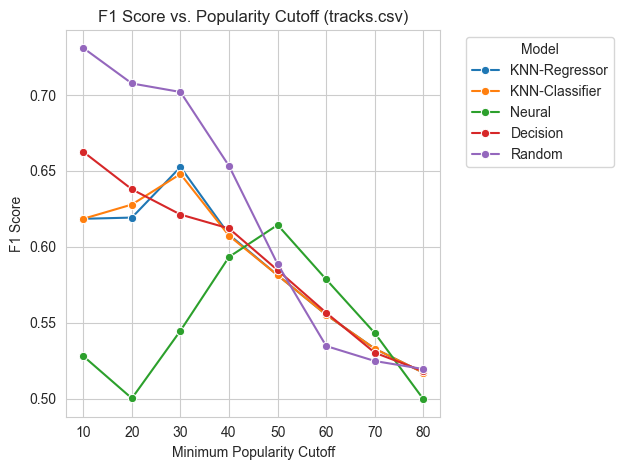

In [22]:
# Ensure the 'model_name' column is added to the df_testing DataFrame correctly
df_testing['model_name'] = df_testing['algorithm'].apply(lambda x: x.split(' ')[1])

# Update the subsets for dataset.csv and tracks.csv with the new df_testing
df_dataset_csv = df_testing[df_testing['model_source'] == 'dataset.csv']
df_tracks_csv = df_testing[df_testing['model_source'] == 'tracks.csv']


# Plot for models trained on dataset.csv
sns.lineplot(data=df_dataset_csv[df_dataset_csv['model_name'] == 'KNN-Regressor'],
             x='dataset_size', y='f1_score', hue='model_name',
             marker='o', palette={'KNN-Regressor': palette['KNN-Regressor']},
             linewidth=4, markersize=10)

sns.lineplot(data=df_dataset_csv[df_dataset_csv['model_name'] != 'KNN-Regressor'],
             x='dataset_size', y='f1_score', hue='model_name',
             marker='o', palette=palette, linewidth=1.5, markersize=6)
plt.title('F1 Score vs. Popularity Cutoff (dataset.csv)')
plt.xlabel('Popularity Cutoff')
plt.ylabel('F1 Score')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Plot for models trained on tracks.csv
sns.lineplot(data=df_tracks_csv, x='dataset_size', y='f1_score', hue='model_name', marker='o', palette='tab10')
plt.title('F1 Score vs. Popularity Cutoff (tracks.csv)')
plt.xlabel('Minimum Popularity Cutoff')
plt.ylabel('F1 Score')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


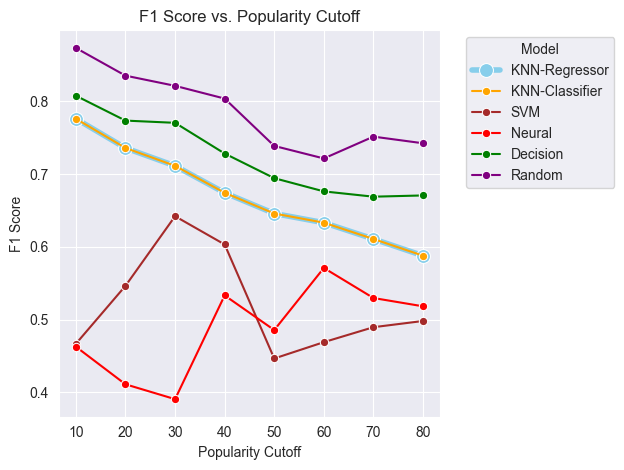

In [21]:


sns.lineplot(data=df_dataset_csv[df_dataset_csv['model_name'] == 'KNN-Regressor'],
             x='dataset_size', y='f1_score', hue='model_name',
             marker='o', palette={'KNN-Regressor': palette['KNN-Regressor']},
             linewidth=4, markersize=10)

sns.lineplot(data=df_dataset_csv[df_dataset_csv['model_name'] != 'KNN-Regressor'],
             x='dataset_size', y='f1_score', hue='model_name',
             marker='o', palette=palette, linewidth=1.5, markersize=6)

plt.title('F1 Score vs. Popularity Cutoff')
plt.xlabel('Popularity Cutoff')
plt.ylabel('F1 Score')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()